# Non-Generation-Based Evolutionary Strategy (NGBES) Optimizer

Traditional ES optimization technique involves generations. This substantially limits the scalability of optimizer. As one have to wait until the generation loop is completed, before proceeding with calculation for the next generation.

NGBES optimizer uses the concept of a "pool"(or a table) of individuals, which allows to avoid the generation loop and get a great scalability win.
<br>
The best way to demonstrate how the NGBES Optimizer is of course by example 

### Example
Let us optimize a 2D non-separable and highly multimodal function

$f(x, y) = -x\sin\left(\sqrt{\mid x-\left(y+47\right) \mid}\right)-(y+47)\sin\left(\sqrt{\mid (y+47)+0.5x\mid}\right)$

$-600\leq x \leq 1000$
<br>
$-600\leq y \leq 1100$
<br><br>

This function is known as $\bf{F101}$, which is taken from "Parallel Problem Solving from Nature - PPSN IX" by Runarsson et al., 2006.

Let us visualize this $\bf{F101}$ function...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Model.FitnessFunction.F101 as F101

%matplotlib inline

In [4]:
def plot_optimization_function(x_min, x_max, y_min, y_max, N, x_opt, y_opt):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)

    x, y = np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N)
    X, Y = np.meshgrid(x, y)

    zs = np.array([F101.func([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    levels = np.linspace(0, 1700, 20)
    im = ax.contour(X, Y, Z, vmin=Z.min(), vmax=Z.max(), linewidths=np.linspace(0.8, 1.5, 6), levels=levels, zorder=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    cb = fig.colorbar(im)
    cb.ax.tick_params(labelsize=15) 
    cb.ax.get_children()
    lines = cb.ax.get_children()[0]
    lines.set_linewidths(8) 

    ax.plot(x_opt, y_opt, 'o', color='cyan', markersize=10)
    ax.arrow(600, 650, x_opt-650, y_opt-665, linewidth=4, head_width=30, head_length=30, zorder=2)
    
    return ax

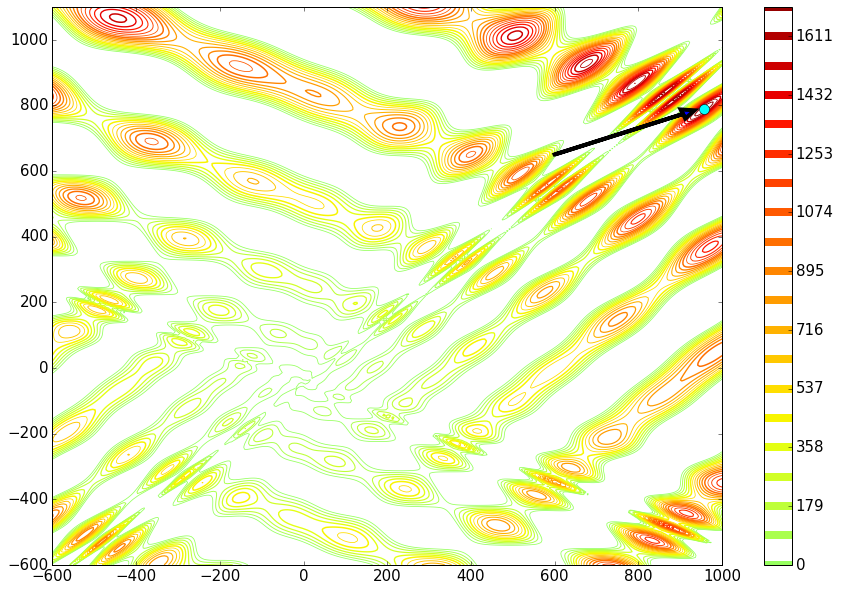

In [5]:
N = 300 # number of sampling points
x_min, x_max = -600, 1000.0
y_min, y_max =  -600.0, 1100.0
x_opt, y_opt = 956.49, 788.38  # location of the optimum for the selected range
plot_optimization_function(x_min, x_max, y_min, y_max, N, x_opt, y_opt)

One can observe a number of local maxima. Some of these maxima are extremely narrow.
<br>
<br>
The global optimum(in the selected range) is located at:
<br>
$\left(x_{opt}, y_{opt}\right) = \left(956.49, 788.38\right)$
<br>
$f_{max} = ??$
<br>
<br>
Near the global maximum there are three other local maxima.
Their values are very close to the value of the global one.
So the lanscape of this 2D function looks sufficiently complex for the optimization.

# Setting up the optimization

In [6]:
from Model.FitnessFunction.fitness import FitnessEvaluator
from Model.Optimizers.NonGenerationBased.parameters_ngb import ParamsNGB
from Model.BioMechanisms.mutation import StandardMutation
from Model.BioMechanisms.recombination import StandardRecombination
from Model.BioMechanisms.selection import RandomUniqueParentsSelection
from Model.Optimizers.NonGenerationBased.optimizer_ngb import OptimizerNGB
from Helpers.statistics_recorder import StatisticsRecorder
from Helpers.mappers import map_linearly_from_to

In [7]:
# set up parameters search space
search_spaces = np.array([[x_min, x_max], [y_min, y_max]])
max_fitness_calls = 1500
is_sigma_array = False
initial_sigma = 0.1
initial_table_size = 40
max_table_size = 40
num_recombined_parents = 2
restarts_num = 1

params = ParamsNGB(search_spaces.shape[0], search_spaces, max_fitness_calls, 
                   is_sigma_array, initial_sigma, initial_table_size, max_table_size)

# fitness object (F101 function)
fitness_object = FitnessEvaluator(F101.func)

# selection, recombination and mutation objects
selection = RandomUniqueParentsSelection(num_recombined_parents).select_random_unique_parents
recombination = StandardRecombination.recombine
mutation = StandardMutation(params.num_params).mutate

# optimization engine
statistics_recorder = StatisticsRecorder(record_after_iterations=200)  # or None to disable
engine = OptimizerNGB(params, selection, recombination, mutation, statistics_recorder)

Now we can launch the optimization

In [8]:
optimization_results = engine.optimization_start(fitness_object)

let's now see how the population evolves as the optimization progresses

8
[ -72.08061299  906.36525506]
[ 805.54081282  793.12680795]
[ 693.69426711  104.71344147]
[-104.00995424  950.90883003]
[ 369.18891617  303.06330438]
[ 529.21998844  198.82987316]
[-372.87409418  275.14188134]
[ 617.03450108   24.94117768]
[ 544.43995895  -72.5336649 ]
[ 436.21475136 -175.48503058]
[ -30.80761153 -461.14186282]
[-372.63766046 -217.06631913]
[-234.29477556 -327.30479101]
[-456.93776955 -539.77873947]
[-127.08096763  301.53543953]
[-504.20548494 -561.62081021]
[ 198.18324375  661.78817215]
[-110.57996974 -190.75723188]
[ 827.68012727 -423.71939477]
[  82.15029354 -242.42770338]
[ 294.27273828 -312.03528287]
[-216.16879034 -106.01844605]
[-107.36821091 -465.79240583]
[ 130.84768146 -110.6958373 ]
[-122.54276219  486.49277879]
[ 115.30016792  892.72845024]
[-464.34738817  610.34328911]
[  98.87566279  338.15466818]
[-111.55137409  386.24587328]
[-585.70648469  180.8204703 ]
[-229.03241811  731.27276925]
[ 412.2031956   409.74442157]
[ 834.16268367 -252.34846941]
[ 337.04

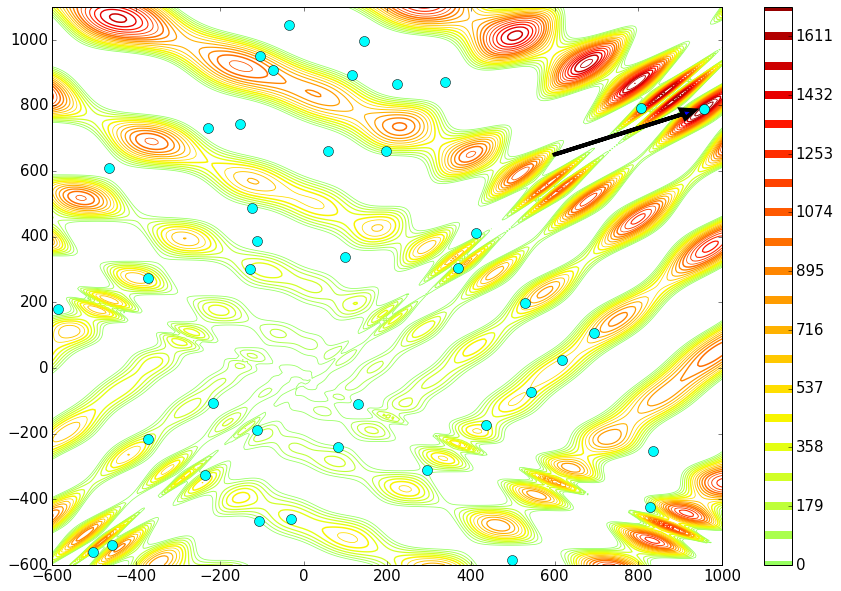

In [9]:
ax = plot_optimization_function(x_min, x_max, y_min, y_max, N, x_opt, y_opt)
print(len(optimization_results[1].records))

def plot_population(table):
    for entry in table:
        mapped_params = map_linearly_from_to(entry.params, [0.0, 1.0], search_spaces)
        print(mapped_params)
        ax.plot(mapped_params[0], mapped_params[1], 'o', color='cyan', markersize=10)

        
plot_population(optimization_results[1].records[0])